In [12]:
# made some adjust for Windows

In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
# experiment_list = ['VGG_38_bn','VGG_38_experiment','VGG_08','VGG_38_dense4f32gr']
experiment_list = ['VGG_38_bn','VGG_08','VGG_38_dense4f32gr','VGG_37_densebc32gr']
experiment_dir = ['..\\' + exper_name for exper_name in experiment_list]

In [2]:
def collect_experiment_dicts(target_dirs, test_flag=False):
    experiment_dicts = dict()
    for target_dir in target_dirs: 
        for subdir, dir, files in os.walk(target_dir):
            for file in files:
                filepath = None
                if not test_flag:
                    if file == 'summary.csv':
                        filepath = os.path.join(subdir, file)

                elif test_flag:
                    if file == 'test_summary.csv':
                        filepath = os.path.join(subdir, file)

                if filepath is not None:
#                     print(filepath)
                    with open(filepath, 'r') as read_file:
                        lines = read_file.readlines()

                    current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                    idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}

                    for line in lines[1:]:
                        for idx, value in enumerate(line.replace('\n', '').split(',')):
                            if(len(value.strip())):
                                current_experiment_dict[idx_to_key[idx]].append(float(value))
                    experiment_dicts[subdir.split('\\')[1]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [3]:
result_dict = collect_experiment_dicts(target_dirs=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

VGG_38_bn ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_08 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_dense4f32gr ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_37_densebc32gr ['train_acc', 'train_loss', 'val_acc', 'val_loss']


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    

D:\Progarm\anaconda\envs\mlp_cw2\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
D:\Progarm\anaconda\envs\mlp_cw2\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


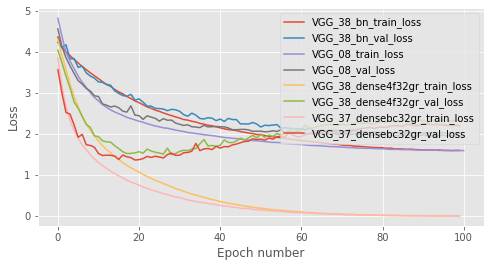

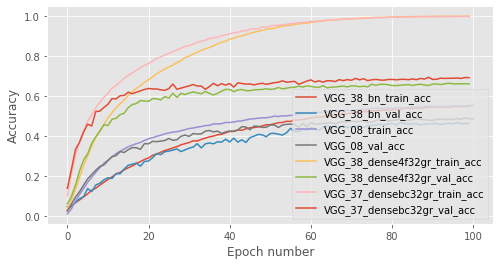

In [5]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=experiment_list)


In [4]:
import torch

def collect_state_dicts(target_dirs, test_flag=False):
    state_dicts = dict()
    
    for target_dir in target_dirs:
        target_dic = {}
        for subdir, dir, files in os.walk(target_dir):
            exper_name = subdir.split('\\')[1]
            output_name = subdir.split('\\')[-1]
            for file in files:
                
                if(output_name != 'saved_models'):
                    continue
                filepath = os.path.join(subdir, file)
#                 if(file != 'train_model_latest'):
#                     continue
                
                    
                state = torch.load(filepath)
                target_dic[str(file)] = state
            state_dicts[exper_name] = target_dic
#                     lines = read_file.readlines()
                    
#                 current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
#                 idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}

#                 for line in lines[1:]:
#                     for idx, value in enumerate(line.replace('\n', '').split(',')):
#                         current_experiment_dict[idx_to_key[idx]].append(float(value))
#                 experiment_dicts[subdir.split('/')[-1].split('\\')[0]] = current_experiment_dict
                
    return state_dicts
                
            

In [5]:
def plot_dist(plot_name, later_weights_dic, former_weights_dic):
        
    fig = plt.figure(figsize=(24, 15))
    
    fig_count = 1
    for layer_name,layer_weigts in former_weights_dic.items():
        split_layer_name = layer_name.split('.')
        block_name = split_layer_name[2]
        conv_name = split_layer_name[4]
        conv_layer_name = '10th_epoch_' + block_name + '_' + conv_name
        
        ax = fig.add_subplot(2,3,fig_count)
        fig_count += 1
        ax.set_title(conv_layer_name)
        ax.set_xlabel('gradients')
        ax.set_ylabel('frequency')
        ax.hist(layer_weigts, bins=100)
    

    for layer_name,layer_weigts in later_weights_dic.items():

        split_layer_name = layer_name.split('.')
        block_name = split_layer_name[2]
        conv_name = split_layer_name[4]
        conv_layer_name = 'last_epoch_' + block_name + '_' + conv_name
        
        ax = fig.add_subplot(2,3,fig_count)
        fig_count += 1
        ax.set_title(conv_layer_name)
        ax.set_xlabel('gradients')
        ax.set_ylabel('frequency')
        ax.hist(layer_weigts, bins=100)
    
    fig.savefig('../data/{}_weights_dist.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format='pdf',
    transparent=False, bbox_inches=None, pad_inches=0.1,
    frameon=None, metadata=None)
    return 

In [6]:
import matplotlib.ticker as ticker

def plot_grads_dist(plot_name, grads_dic_0, grads_dic_50, grads_dic_99):
        
    fig = plt.figure(figsize=(24, 18))
    fig.tight_layout()#调整整体空白
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    fig_count = 1
#     plt.tick_params(labelsize=9)
    for layer_name, layer_grads in grads_dic_0.items():
        split_layer_name = layer_name.split('.')
        block_name = split_layer_name[2]
        conv_name = split_layer_name[4]
        conv_layer_name = 'grads_' + block_name + '_' + conv_name
        
        ax = fig.add_subplot(3,3,fig_count)
        
        fig_count += 1
        ax.set_title('epoch0_'+conv_layer_name,fontsize=25)
        ax.set_xlabel('gradients',fontsize=20)
        ax.set_ylabel('count',fontsize=20)
        ax.hist(layer_grads, bins=50)
        
        #scientific
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,1)) 
        ax.xaxis.set_major_formatter(formatter)
    
    for layer_name, layer_grads in grads_dic_50.items():
        split_layer_name = layer_name.split('.')
        block_name = split_layer_name[2]
        conv_name = split_layer_name[4]
        conv_layer_name = 'grads_' + block_name + '_' + conv_name
        
        ax = fig.add_subplot(3,3,fig_count)
        
        fig_count += 1
        ax.set_title('epoch50_'+conv_layer_name,fontsize=25)
        ax.set_xlabel('gradients',fontsize=20)
        ax.set_ylabel('count',fontsize=20)

        ax.hist(layer_grads, bins=50)
        
        #scientific
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,1)) 
        ax.xaxis.set_major_formatter(formatter)
        
    for layer_name, layer_grads in grads_dic_99.items():
        split_layer_name = layer_name.split('.')
        block_name = split_layer_name[2]
        conv_name = split_layer_name[4]
        conv_layer_name = 'grads_' + block_name + '_' + conv_name
        
        ax = fig.add_subplot(3,3,fig_count)
        
        fig_count += 1
        ax.set_title('epoch99_'+conv_layer_name,fontsize=25)
        ax.set_xlabel('gradients',fontsize=20)
        ax.set_ylabel('count',fontsize=20)
        ax.hist(layer_grads, bins=50)
        
        #scientific
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,1)) 
        ax.xaxis.set_major_formatter(formatter)
        
        
    fig.tight_layout()#调整整体空白
#     plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距

#     for layer_name,layer_weigts in later_weights_dic.items():

#         split_layer_name = layer_name.split('.')
#         block_name = split_layer_name[2]
#         conv_name = split_layer_name[4]
#         conv_layer_name = 'last_epoch_' + block_name + '_' + conv_name
        
#         ax = fig.add_subplot(2,3,fig_count)
#         fig_count += 1
#         ax.set_title(conv_layer_name)
#         ax.set_xlabel('gradients')
#         ax.set_ylabel('frequency')
#         ax.hist(layer_weigts, bins=100)
    
    fig.savefig('../data/{}_grads_dist.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format='pdf',
    transparent=False, bbox_inches=None, pad_inches=0.1,
    frameon=None, metadata=None)
    return 

In [19]:
experiment_list = ['VGG_37_densebc32grdrp5wd10e3','VGG_38_experiment','VGG_37_densebc32grdrp5wd10e4']
experiment_dir = ['..\\' + exper_name for exper_name in experiment_list]
state_result_dict = collect_state_dicts(target_dirs=experiment_dir)
print(state_result_dict['VGG_38_experiment'].keys())

dict_keys(['train_model_0', 'train_model_1', 'train_model_10', 'train_model_11', 'train_model_12', 'train_model_13', 'train_model_14', 'train_model_15', 'train_model_16', 'train_model_17', 'train_model_18', 'train_model_19', 'train_model_2', 'train_model_20', 'train_model_21', 'train_model_22', 'train_model_23', 'train_model_24', 'train_model_25', 'train_model_26', 'train_model_27', 'train_model_28', 'train_model_29', 'train_model_3', 'train_model_30', 'train_model_31', 'train_model_32', 'train_model_33', 'train_model_34', 'train_model_35', 'train_model_36', 'train_model_37', 'train_model_38', 'train_model_39', 'train_model_4', 'train_model_40', 'train_model_41', 'train_model_42', 'train_model_43', 'train_model_44', 'train_model_45', 'train_model_46', 'train_model_47', 'train_model_48', 'train_model_49', 'train_model_5', 'train_model_50', 'train_model_51', 'train_model_52', 'train_model_53', 'train_model_54', 'train_model_55', 'train_model_56', 'train_model_57', 'train_model_58', 'trai

In [20]:
print(state_result_dict['VGG_37_densebc32grdrp5wd10e3']['train_model_latest']['best_val_model_idx'])
print(state_result_dict['VGG_37_densebc32grdrp5wd10e3']['train_model_latest']['best_val_model_acc'])

81
0.6864


In [27]:
print(state_result_dict['VGG_38_experiment']['train_model_1']['train_grads']['model.layer_dict.input_conv.layer_dict.conv_0.weight'])

tensor([[[[-3.6699e-19, -2.2908e-19,  9.5003e-20],
          [-7.1557e-19, -5.5393e-19, -2.4916e-19],
          [-1.4081e-18, -8.7815e-19, -5.0830e-19]],

         [[-3.9583e-20,  1.5642e-19,  4.6063e-19],
          [-5.0572e-19, -3.3255e-19,  2.1980e-20],
          [-1.1030e-18, -5.8051e-19, -1.6787e-19]],

         [[ 1.1571e-19,  1.6963e-19,  4.5899e-19],
          [-2.8758e-19, -2.3778e-19,  3.3664e-20],
          [-6.2501e-19, -2.4462e-19,  5.4121e-20]]],


        [[[ 3.3234e-19,  2.6871e-19,  7.2850e-20],
          [ 3.8436e-19,  2.9337e-19,  1.2289e-19],
          [ 1.9363e-19,  2.6378e-21, -2.8269e-19]],

         [[ 1.1995e-19,  9.4592e-20, -6.7547e-20],
          [ 1.7064e-19,  1.2317e-19, -1.2798e-20],
          [-2.4516e-20, -1.6744e-19, -4.0227e-19]],

         [[ 9.2164e-20,  8.0183e-20, -2.3846e-20],
          [ 1.8631e-19,  1.2663e-19,  2.5049e-20],
          [-2.3962e-20, -1.7077e-19, -3.5482e-19]]],


        [[[-2.8779e-20, -1.4685e-20, -2.1867e-19],
          [ 1.0

          [ 2.7103e-19,  1.8433e-19,  1.3312e-19]]]], device='cuda:0')


In [95]:
print(np.max(state_result_dict['VGG_38_experiment']['train_model_1']['train_grads']['model.layer_dict.input_conv.layer_dict.conv_0.weight'].cpu().numpy()))

2.0056373e-18


### gradients vanishing

D:\Progarm\anaconda\envs\mlp_cw2\lib\site-packages\ipykernel_launcher.py:92: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


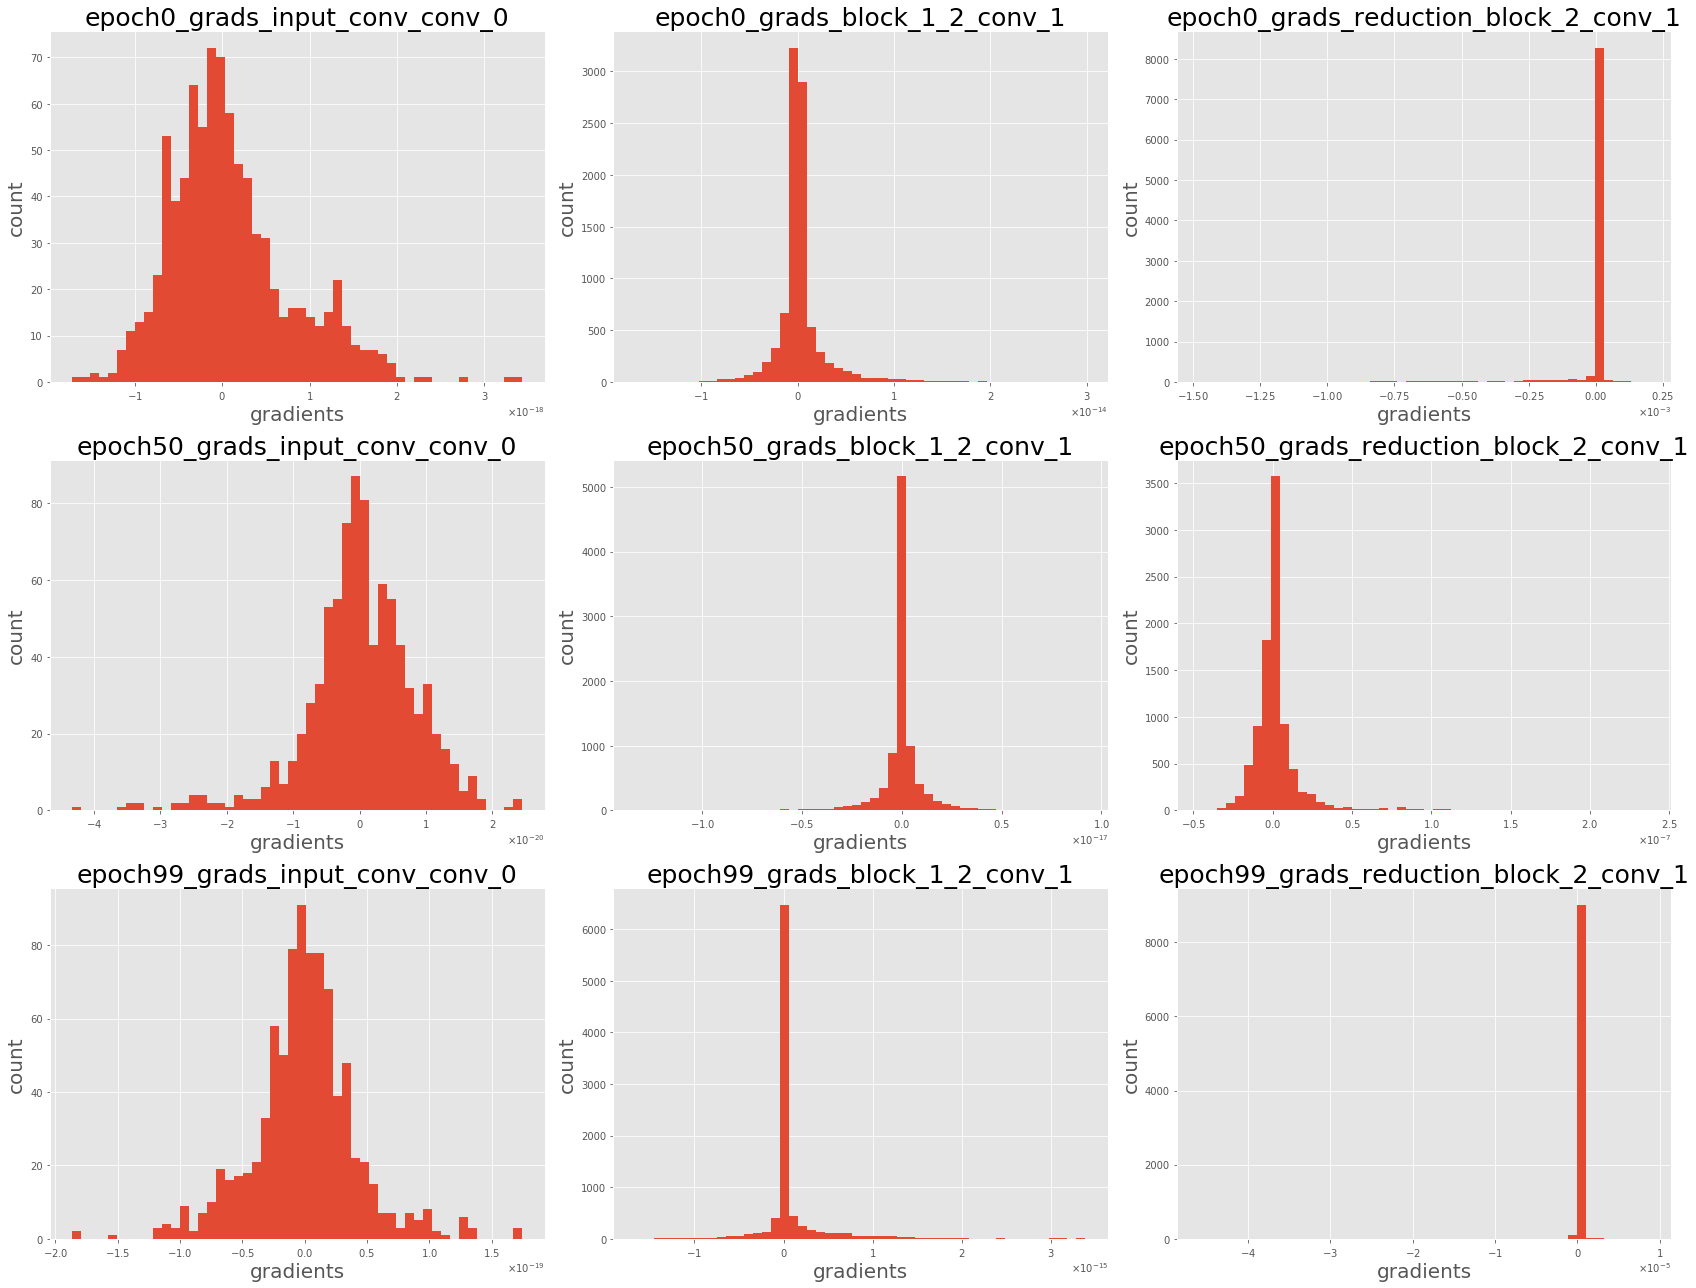

In [63]:

weights_care = ['model.layer_dict.input_conv.layer_dict.conv_0.weight','model.layer_dict.block_1_2.layer_dict.conv_1.weight', 'model.layer_dict.reduction_block_2.layer_dict.conv_1.weight']
grads_dic_0 = {}
grads_dic_50 = {}
grads_dic_99 = {}
for layer_name in weights_care:
    grads_dic_0[layer_name] = None
    grads_dic_50[layer_name] = None
    grads_dic_99[layer_name] = None
    
# layer_weights_dic = dict([(layer_name,layer_weights.cpu().numpy().reshape((-1))) for layer_name,layer_weights in state_result_dict['VGG_38_experiment']['train_model_latest']['network'].items() if ('conv_1' in layer_name and 'bias' not in layer_name)])

for train_epoch in state_result_dict['VGG_38_experiment'].keys():
    if('latest' in train_epoch):
        continue
    if('train_model_0' in train_epoch):
        for layer_name in weights_care:
            if(grads_dic_0[layer_name] is None):
                grads_dic_0[layer_name] = state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1))
            else:
                grads_dic_0[layer_name] = np.append(grads_dic_0[layer_name], state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1)))
    elif('train_model_50' in train_epoch):
        for layer_name in weights_care:
            if(grads_dic_50[layer_name] is None):
                grads_dic_50[layer_name] = state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1))
            else:
                grads_dic_50[layer_name] = np.append(grads_dic_50[layer_name], state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1)))
    elif('train_model_99' in train_epoch):
        for layer_name in weights_care:
            if(grads_dic_99[layer_name] is None):
                grads_dic_99[layer_name] = state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1))
            else:
                grads_dic_99[layer_name] = np.append(grads_dic_99[layer_name], state_result_dict['VGG_38_experiment'][train_epoch]['train_grads'][layer_name].cpu().numpy().reshape((-1)))


plot_grads_dist('different_layer', grads_dic_0 = grads_dic_0,grads_dic_50 = grads_dic_50, grads_dic_99 = grads_dic_99)

In [42]:
weights_care = ['model.layer_dict.block_0_0.layer_dict.conv_1.weight','model.layer_dict.block_2_3.layer_dict.conv_1.weight']

# layer_weights_dic = dict([(layer_name,layer_weights.cpu().numpy().reshape((-1))) for layer_name,layer_weights in state_result_dict['VGG_38_experiment']['train_model_latest']['network'].items() if ('conv_1' in layer_name and 'bias' not in layer_name)])

later_layer_weights_dic = dict([(layer_name,layer_weights.cpu().numpy().reshape((-1))) for layer_name,layer_weights in state_result_dict['VGG_38_bn']['train_model_latest']['network'].items() if layer_name in weights_care])
former_layer_weights_dic = dict([(layer_name,layer_weights.cpu().numpy().reshape((-1))) for layer_name,layer_weights in state_result_dict['VGG_38_bn']['train_model_10']['network'].items() if layer_name in weights_care])

# layer_dic_name = 'model.layer_dict.block_2_2.layer_dict.conv_1.weight'
# some_weights = state_result_dict['train_model_latest']['network'][layer_dic_name].cpu().numpy().reshape((-1))
len(later_layer_weights_dic.keys())
len(former_layer_weights_dic.keys())
# layer_weights_dic.keys()
plot_dist('batch_norm_model_weights',later_weights_dic=later_layer_weights_dic, former_weights_dic= former_layer_weights_dic)

KeyError: 'VGG_38_bn'

In [7]:
experiment_list = ['VGG_37_densebc5f32grdrp5wd10e4_local','VGG_38_densenobn','VGG_37_densebc16grwd10e3','VGG_37_densebc16grwd10e4','VGG_37_densebc16grdrp5wd10e3','VGG_37_densebc16grdrp5wd10e4','VGG_37_densebc16grdrp5','VGG_37_densebc32grdrp5','VGG_37_densebc32grdrp5wd10e3','VGG_37_densebc32grdrp5wd10e4','VGG_37_densebc32grwd10e3','VGG_37_densebc32grwd10e4','VGG_37_densebc32gr']
# experiment_list = ['VGG_37_densebc5f32grwd10e4','VGG_37_densebc5f32grwd10e4_local']
experiment_dir = ['..\\' + exper_name for exper_name in experiment_list]
state_result_dict = collect_state_dicts(target_dirs=experiment_dir)

In [8]:
for experiment in experiment_list:
    
    print('Experiment:{0}\nval_idx:{1}\tval_acc:{2}'.format(experiment,state_result_dict[experiment]['train_model_latest']['best_val_model_idx'],state_result_dict[experiment]['train_model_latest']['best_val_model_acc']))

KeyError: 'VGG_37_densebc5f32grdrp5wd10e4_local'

In [9]:
state_result_dict.keys()

dict_keys(['VGG_38_densenobn', 'VGG_37_densebc16grwd10e3', 'VGG_37_densebc16grwd10e4', 'VGG_37_densebc16grdrp5wd10e3', 'VGG_37_densebc16grdrp5wd10e4', 'VGG_37_densebc16grdrp5', 'VGG_37_densebc32grdrp5', 'VGG_37_densebc32grdrp5wd10e3', 'VGG_37_densebc32grdrp5wd10e4', 'VGG_37_densebc32grwd10e3', 'VGG_37_densebc32grwd10e4', 'VGG_37_densebc32gr'])